### House Price Prediction

In [42]:
import pandas as pd
import torch
import torch.nn as nn

Importing the Boston Housing Database

In [43]:
df = pd.read_csv("BostonHousing.csv")
df.head()

,crime,landzone,indus,chas,nox,room,age,distance,rad,tax,ptratio,b,lstatus,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [44]:
x = df.drop('price', axis=1)
y = df['price']

In [45]:
x = x.values
y = y.values

Scaling the database to to equaily fit every features 

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)  # Scaling features

In [47]:
X_scaled = torch.tensor(X_scaled, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)  

Splitting the database for training and testing the models

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [49]:
type(x), type(y), type(X_scaled),type(y_train)

(numpy.ndarray, torch.Tensor, torch.Tensor, torch.Tensor)

#### Visualize the dataset

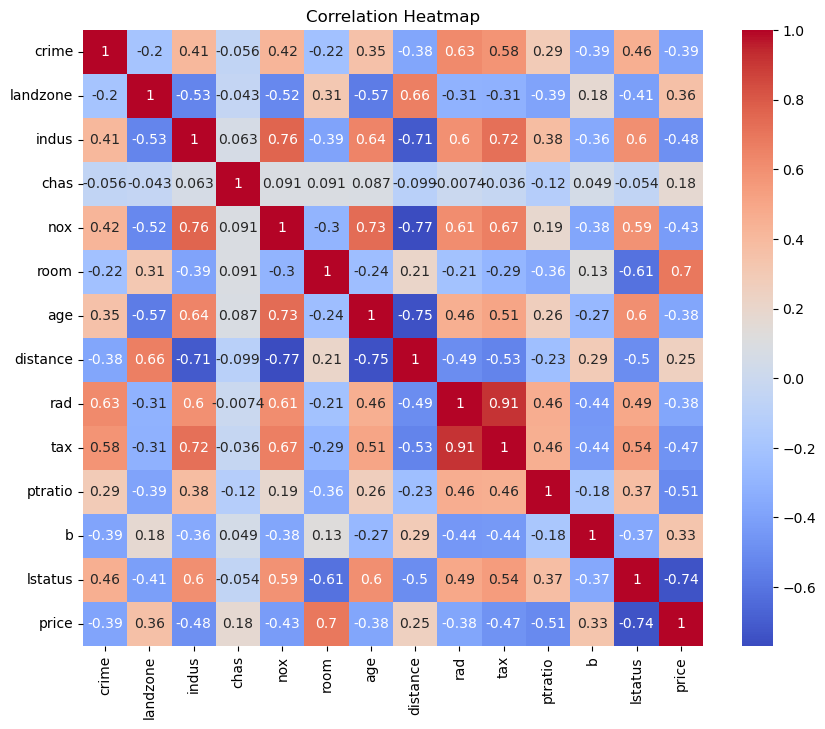

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

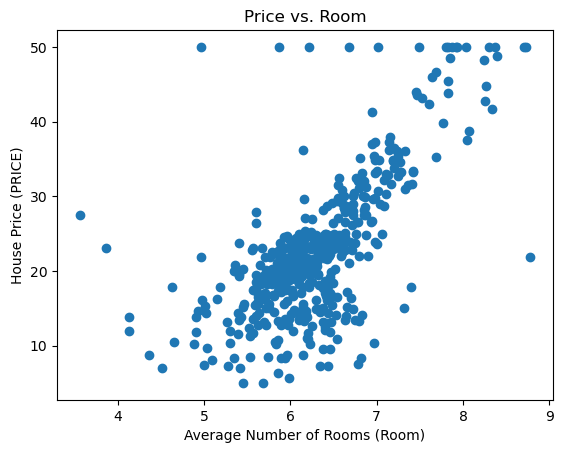

In [51]:
# Scatter plot of RM (average number of rooms per dwelling) vs PRICE
plt.scatter(df['room'], df['price'])
plt.xlabel('Average Number of Rooms (Room)')
plt.ylabel('House Price (PRICE)')
plt.title('Price vs. Room')
plt.show()

Text(0.5, 1.0, 'Price vs Population Status')

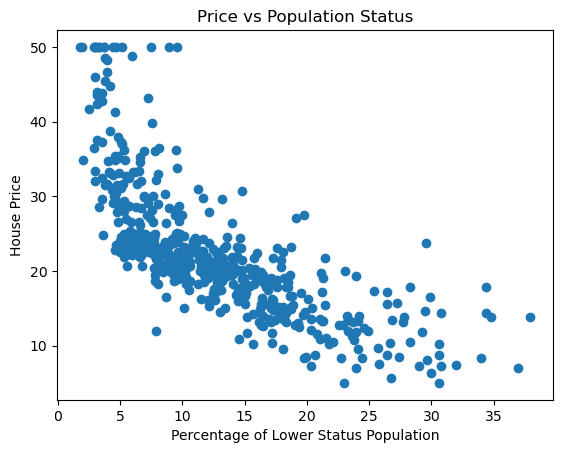

In [52]:
# scatter plot of lstat vs price
plt.scatter(df['lstatus'], df['price'])
plt.xlabel('Percentage of Lower Status Population')
plt.ylabel('House Price')
plt.title('Price vs Population Status')

#### Building a Linear Regression Model

In [53]:
import torch.nn as nn

# Define a simple Linear Regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # 1 output, since we are predicting house price
        
    def forward(self, x):
        return self.linear(x)

# Initialize the model
input_dim = X_train.shape[1]
model = LinearRegressionModel(input_dim)

# Loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

#### Building a neural network

In [54]:
class NeuralNet(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, 1)  # 1 output (price prediction)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Initialize the model
model_nn = NeuralNet(input_dim=input_dim, hidden_dim=64)  # e.g., 64 hidden units
optimizer_nn = torch.optim.Adam(model_nn.parameters(), lr=0.001)

#### Training the Linear model

In [55]:
# Train the Linear Regression Model
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    
    # Forward pass: Compute prediction
    y_pred_train = model(X_train)
    
    # Compute loss
    loss = criterion(y_pred_train, y_train)
    
    # Backward pass: Compute gradient and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 32.9642
Epoch [200/1000], Loss: 22.8182
Epoch [300/1000], Loss: 22.2297
Epoch [400/1000], Loss: 22.0092
Epoch [500/1000], Loss: 21.8861
Epoch [600/1000], Loss: 21.8118
Epoch [700/1000], Loss: 21.7643
Epoch [800/1000], Loss: 21.7323
Epoch [900/1000], Loss: 21.7099
Epoch [1000/1000], Loss: 21.6936


#### Training the neural network model

In [56]:
# Train the Neural Network Model
num_epochs = 1000
for epoch in range(num_epochs):
    model_nn.train()
    
    # Forward pass: Compute prediction
    y_pred_train = model_nn(X_train)
    
    # Compute loss
    loss = criterion(y_pred_train, y_train)
    
    # Backward pass: Compute gradient and update the weights
    optimizer_nn.zero_grad()
    loss.backward()
    optimizer_nn.step()
    
    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], NN Loss: {loss.item():.4f}')

Epoch [100/1000], NN Loss: 438.0304
Epoch [200/1000], NN Loss: 165.5623
Epoch [300/1000], NN Loss: 60.2288
Epoch [400/1000], NN Loss: 32.4985
Epoch [500/1000], NN Loss: 25.3069
Epoch [600/1000], NN Loss: 21.7684
Epoch [700/1000], NN Loss: 18.9343
Epoch [800/1000], NN Loss: 16.6342
Epoch [900/1000], NN Loss: 14.8701
Epoch [1000/1000], NN Loss: 13.4650


#### Testing the Linear Model

In [57]:
model.eval()  # Set to evaluation mode
with torch.no_grad():  # No need to track gradients
    y_pred_test = model(X_test)
    test_loss = criterion(y_pred_test, y_test)
    # for i in range(len(y_pred_test)):
    #     print(f"y_eval: {y_pred_test[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test[i].item() - y_test[i]}.")
    rmse = torch.sqrt(test_loss)
    print(f'Linear Regression Test RMSE: {rmse.item():.4f}')

Linear Regression Test RMSE: 4.9718


#### Testing the neural network model

In [58]:
# Evaluation on test data (Neural Network)
model_nn.eval()
with torch.no_grad():
    y_pred_test_nn = model_nn(X_test)
    test_loss_nn = criterion(y_pred_test_nn, y_test)
    # for i in range(len(y_pred_test_nn)):
    #     print(f"y_eval: {y_pred_test_nn[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test_nn[i].item() - y_test[i]}.")
    rmse_nn = torch.sqrt(test_loss_nn)
    print(f'Neural Network Test RMSE: {rmse_nn.item():.4f}')

Neural Network Test RMSE: 4.0460


In [59]:
# Extract the learned coefficients (Linear Regression)
weights = model.linear.weight.detach().numpy().flatten()
features = df.columns[:-1]  # All feature names

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': features, 'Weights': weights})
importance_df = importance_df.sort_values(by='Weights', ascending=False)

print(importance_df)

     Feature   Weights
5       room  3.173941
8        rad  1.695897
11         b  1.125903
3       chas  0.733246
1   landzone  0.580411
2      indus  0.087946
6        age -0.192266
0      crime -0.920471
9        tax -1.161748
4        nox -1.898288
10   ptratio -1.952708
7   distance -2.948846
12   lstatus -3.605114


#### Ridge regression model

Building the Ridge Regression model

In [60]:
def ridge_loss(output, target, modl, alpha):
    mse_loss = nn.MSELoss()(output, target)
    l2_reg = torch.tensor(0.)
    for param in modl.parameters():
        l2_reg += torch.norm(param)
    return l2_reg + mse_loss + alpha

model_ridge = LinearRegressionModel(input_dim)
optimizer_ridge = torch.optim.SGD(model_ridge.parameters(), lr=0.01)

Training the ridge model

In [61]:
num_epochs = 1000
for epoch in range(num_epochs):
    model_ridge.train()
    y_pred_train = model_ridge(X_train)
    
    loss_ridge = ridge_loss(y_pred_train, y_train, model_ridge, 0.1)
    
    optimizer_ridge.zero_grad()
    loss_ridge.backward()
    optimizer_ridge.step()
    
    if (epoch) % 99 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss_ridge.item():.10f}')

Epoch [1/1000], Loss: 602.5293579102
Epoch [100/1000], Loss: 60.1745834351
Epoch [199/1000], Loss: 50.9270019531
Epoch [298/1000], Loss: 50.5416641235
Epoch [397/1000], Loss: 50.4567565918
Epoch [496/1000], Loss: 50.4240493774
Epoch [595/1000], Loss: 50.4101982117
Epoch [694/1000], Loss: 50.4040069580
Epoch [793/1000], Loss: 50.4010848999
Epoch [892/1000], Loss: 50.3996467590
Epoch [991/1000], Loss: 50.3989105225


Testing the model

In [62]:
model_ridge.eval()
with torch.no_grad():
    y_pred_test_ridge = model_ridge(X_test)
    test_loss_ridge = criterion(y_pred_test_ridge, y_test)
    # for i in range(len(y_pred_test_ridge)):
    #     print(f"y_eval: {y_pred_test_ridge[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test_ridge[i].item() - y_test[i]}.")
    rmse_ridge = torch.sqrt(test_loss_ridge)
    print(f'Ridge Regression Model Test RMSE: {rmse_ridge.item():.4f}')

Ridge Regression Model Test RMSE: 5.0447


In [63]:
weights_ridge = model_ridge.linear.weight.detach().numpy().flatten()

importance_df_ridge = pd.DataFrame({'Feature': features, 'Weights': weights_ridge})
importance_df_ridge = importance_df_ridge.sort_values(by='Weights', ascending=False)

print(importance_df_ridge)

     Feature   Weights
5       room  3.184349
11         b  1.046137
8        rad  0.950445
3       chas  0.765915
1   landzone  0.359614
2      indus -0.162574
6        age -0.186214
9        tax -0.719963
0      crime -0.777323
4        nox -1.282035
10   ptratio -1.784307
7   distance -2.172603
12   lstatus -3.278555


#### Lasso Regression model 

Building the model

In [64]:
def lasso_loss(output, target, model, alpha):
    mse_loss = nn.MSELoss()(output, target)
    l1_reg = torch.tensor(0.)
    for param in model.parameters():
        l1_reg += torch.sum(torch.abs(param))
    return mse_loss + alpha + l1_reg

model_lasso = LinearRegressionModel(input_dim)
optimizer_lasso = torch.optim.SGD(model_lasso.parameters(), lr=0.01)

Training the model

In [65]:
epochs = 1000

for epoch in range(epochs):
    model_lasso.train()

    y_pred_train = model_lasso(X_train)

    loss_lasso = lasso_loss(y_pred_train, y_train, model_lasso, 0.1)

    optimizer_lasso.zero_grad()
    loss_lasso.backward()
    optimizer_lasso.step()

    if (epoch+1) % 100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss_lasso.item():.4f}")

Epoch: 99, Loss: 66.6269
Epoch: 199, Loss: 57.8126
Epoch: 299, Loss: 57.6127
Epoch: 399, Loss: 57.6103
Epoch: 499, Loss: 57.5994
Epoch: 599, Loss: 57.6028
Epoch: 699, Loss: 57.5928
Epoch: 799, Loss: 57.5933
Epoch: 899, Loss: 57.6036
Epoch: 999, Loss: 57.5962


Testing the model

In [66]:
model_lasso.eval()
with torch.no_grad():
    y_pred_test_lasso = model_lasso(X_test)
    test_loss_lasso = criterion(y_pred_test_lasso, y_test)
    # for i in range(len(y_pred_test_lasso)):
    #     print(f"y_eval: {y_pred_test_lasso[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test_lasso[i].item() - y_test[i]}.")
    rmse_lasso = torch.sqrt(test_loss_lasso)
    print(f'Lasso Regression Model Test RMSE: {rmse_lasso.item():.4f}')

Lasso Regression Model Test RMSE: 5.2799


#### Support Vector Regressor

Building the model

In [67]:
class SupportVectorRegressor(nn.Module):
    def __init__(self, n_features, epsilon=0.1, c=1.0):
        super(SupportVectorRegressor, self).__init__()
        self.linear = nn.Linear(n_features, 1)
        self.epsilon = epsilon
        self.c = c

    def forward(self, x):
        return self.linear(x)
    
    def epsilon_intesive_loss(self, pred, targets):
        abs_error = torch.abs(pred - targets)
        loss = torch.where(abs_error < self.epsilon, torch.zeros_like(abs_error), abs_error - self.epsilon)
        return torch.mean(loss) + self.c + torch.sum(self.linear.weight ** 2)
    
svr_model = SupportVectorRegressor(input_dim)
optimizer_svr = torch.optim.SGD(svr_model.parameters(), lr=0.01)

Training the model

In [68]:
epochs = 1000
for epoch in range(epochs):
    y_pred = svr_model(X_train)
    loss_svr = svr_model.epsilon_intesive_loss(y_pred, y_train)

    optimizer_svr.zero_grad()
    loss_svr.backward()
    optimizer_svr.step()

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss_svr.item()}")

Epoch: 0, Loss: 23.868730545043945
Epoch: 100, Loss: 22.588977813720703
Epoch: 200, Loss: 21.58405876159668
Epoch: 300, Loss: 20.583974838256836
Epoch: 400, Loss: 19.58397102355957
Epoch: 500, Loss: 18.58437728881836
Epoch: 600, Loss: 17.596357345581055
Epoch: 700, Loss: 16.6216983795166
Epoch: 800, Loss: 15.673243522644043
Epoch: 900, Loss: 14.762763977050781


Testing the model

In [69]:
with torch.no_grad():
    y_pred_test_svr = svr_model(X_test)
    test_loss_svr = svr_model.epsilon_intesive_loss(y_pred_test_svr, y_test)
    # for i in range(len(y_pred_test_svr)):
    #     print(f"y_eval: {y_pred_test_svr[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test_svr[i].item() - y_test[i]}.")
    rmse_svr = torch.sqrt(nn.MSELoss()(y_pred_test_svr, y_test))
    print(f'Support Vector Regressor Test RMSE: {rmse_svr.item():.4f}')

Support Vector Regressor Test RMSE: 14.2366


In [70]:
weights_svr = svr_model.linear.weight.detach().numpy().flatten()

importance_df_svr = pd.DataFrame({'Feature': features, 'Weight': weights_svr})
importance_df_svr = importance_df_svr.sort_values(by='Weight', ascending=False)

print(importance_df_svr)

     Feature    Weight
5       room  0.046605
7   distance  0.041088
11         b  0.040507
1   landzone  0.022718
3       chas  0.015378
6        age -0.033456
4        nox -0.036870
2      indus -0.052534
10   ptratio -0.061884
8        rad -0.067991
9        tax -0.070577
0      crime -0.070766
12   lstatus -0.086513


#### Tree Regressor Model ( Decision Tree, Random Forest, Gradient Boosting )

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

Training the Decision Tree Regressor Model

In [72]:
dtr_model = DecisionTreeRegressor(random_state=42)

dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

Training the Random Forest MModel

In [73]:
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)

rfr_model.fit(X_train, y_train)

/home/imck037/anaconda3/envs/mlenv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

Training the Gradient Boosting Regressor Model

In [74]:
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, random_state=42)

gbr_model.fit(X_train, y_train)

/home/imck037/anaconda3/envs/mlenv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(learning_rate=0.01, random_state=42)

Testing the Decision Tree Model

In [75]:
y_pred_test_dtr = dtr_model.predict(X_test)
loss_dtr = mean_squared_error(y_pred_test_dtr, y_test)
# for i in range(len(y_pred_test_dtr)):
#     print(f"y_eval: {y_pred_test_dtr[i].item():.4f}, y_test: {y_test[i].item():.4f}, diff: {y_pred_test_dtr[i].item() - y_test[i].item()}.")
rmse_dtr = (loss_dtr ** (1/2))
print(f'Decision Tree Regressor Test RMSE: {rmse_dtr.item():.4f}')

Decision Tree Regressor Test RMSE: 4.0742


Testing The Random Forest Model

In [76]:
y_pred_test_rfr = rfr_model.predict(X_test)
loss_rfr = mean_squared_error(y_pred_test_rfr, y_test)
# for i in range(len(y_pred_test_rfr)):
#     print(f"y_eval: {y_pred_test_rfr[i].item():.4f}, y_test: {y_test[i].item():.4f}, diff: {y_pred_test_rfr[i].item() - y_test[i].item()}.")
rmse_rfr = (loss_rfr ** (1/2))
print(f'Random Forest Regressor Test RMSE: {rmse_rfr.item():.4f}')

Random Forest Regressor Test RMSE: 2.8581


Testing the Gradient Boosting Model

In [77]:
y_pred_test_gbr = gbr_model.predict(X_test)
loss_gbr = mean_squared_error(y_pred_test_gbr, y_test)
# for i in range(len(y_pred_test_gbr)):
#     print(f"y_eval: {y_pred_test_gbr[i].item():.4f}, y_test: {y_test[i].item():.4f}, diff: {y_pred_test_gbr[i].item() - y_test[i].item()}.")
rmse_gbr = (loss_gbr ** (1/2))
print(f'Gradient Boosting Regressor Test RMSE: {rmse_gbr.item():.4f}')

Gradient Boosting Regressor Test RMSE: 4.5800


#### Visualize The model performance with shap

In [78]:
def model_predict(data_as_numpy):
    data_as_tensor = torch.tensor(data_as_numpy, dtype=torch.float32)
    with torch.no_grad():
        return model(data_as_tensor).numpy()

Shap interpretation of Linear Regression Model

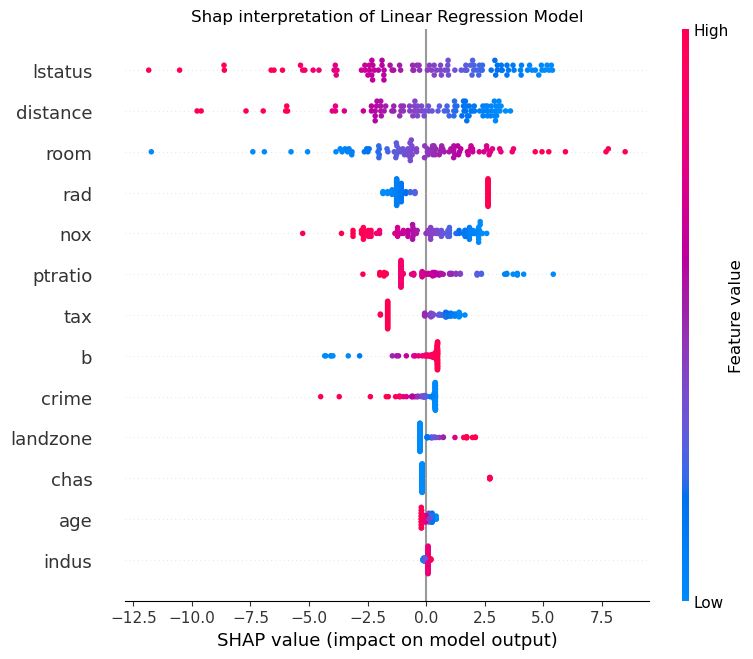

In [79]:
import shap

explainer = shap.Explainer(model_predict, masker=X_test.numpy())

shap_values = explainer.shap_values(X_test.numpy())

plt.title('Shap interpretation of Linear Regression Model')
shap.summary_plot(shap_values, X_test, feature_names=features)
plt.show()

Shap Interpretation of Decison Tree Regressor Model

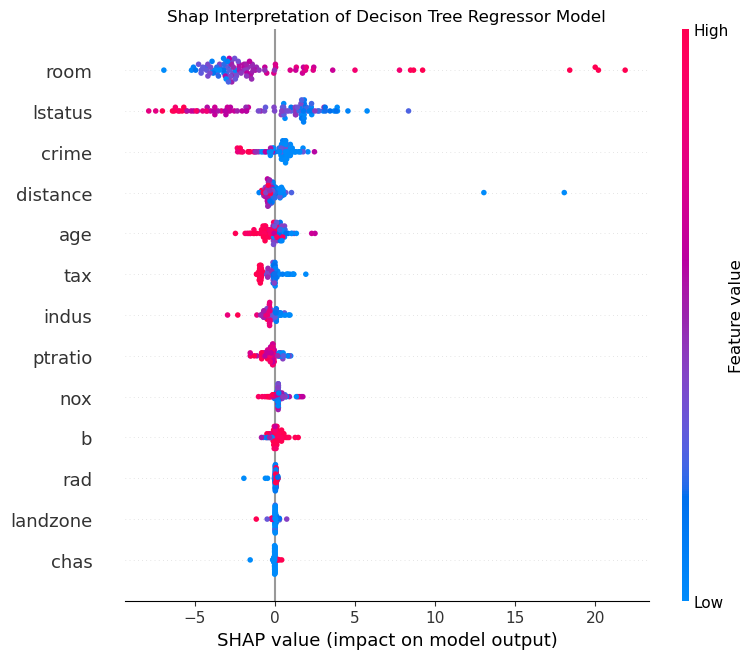

In [80]:
dtr_explainer = shap.TreeExplainer(dtr_model)

dtr_shap_values = dtr_explainer.shap_values(X_test.numpy())

plt.title('Shap Interpretation of Decison Tree Regressor Model')
shap.summary_plot(dtr_shap_values, X_test, feature_names=features)
plt.show()

Shap Interpretation of Random Forest Regressor Model

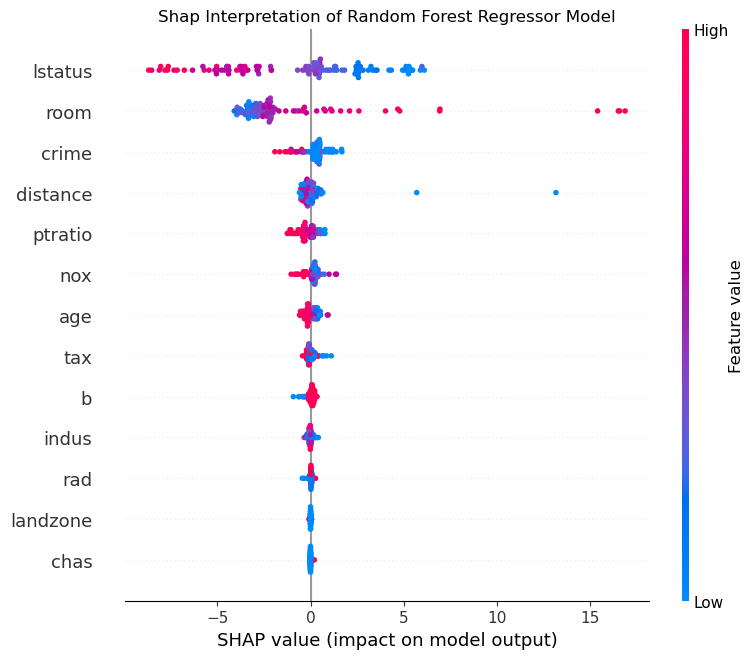

In [81]:

rfr_explainer = shap.TreeExplainer(rfr_model)

rfr_shap_values = rfr_explainer.shap_values(X_test.numpy())

plt.title('Shap Interpretation of Random Forest Regressor Model')
shap.summary_plot(rfr_shap_values, X_test, feature_names=features)
plt.show()

Shap Interpretation of Gradient Boosting Regressor Model

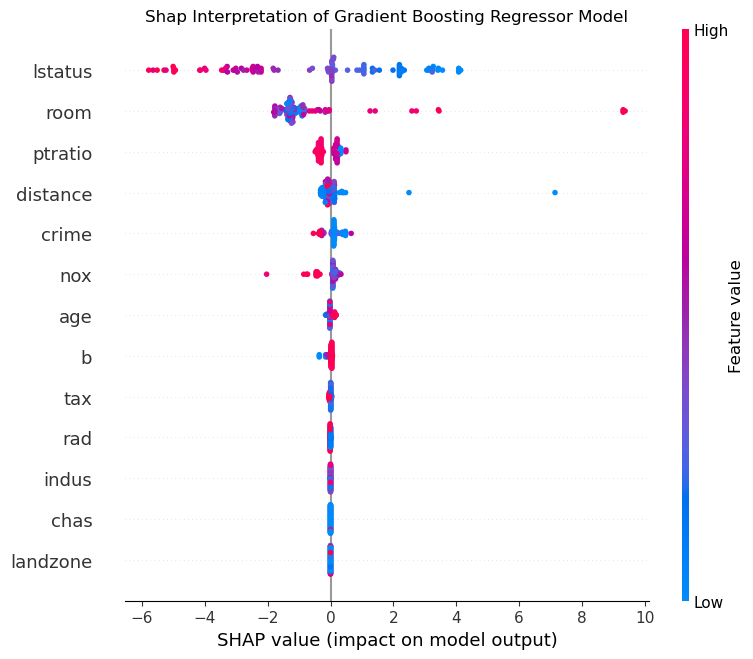

In [82]:

gbr_explainer = shap.TreeExplainer(gbr_model)

gbr_shap_values = gbr_explainer.shap_values(X_test.numpy())

plt.title('Shap Interpretation of Gradient Boosting Regressor Model')
shap.summary_plot(gbr_shap_values, X_test, feature_names=features)
plt.show()